<a href="https://colab.research.google.com/github/pallaviferrao/imageclassifcation/blob/main/imageclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:

#load cifar DeprecationWarning
# Image classification CNN
#SimCLR
#Moco
#DNN
#LR
#SVM
#Resnet


In [54]:
import torch
import torchvision
import torchvision.transforms as transform

In [77]:
class ImageClassification:
  def __init__(self):
    self.trainloader = None
    self.transform = transforms.ToTensor()
    self.image = None
    self.label =None
    self.testloader = None

  def load_data(self):
    # transform = transforms.Compose([
    # transforms.ToTensor(),  # Convert images to PyTorch tensors
    # # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1]
    # ])
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True,  transform=self.transform)
    self.trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

    # Download and load the test dataset
    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True,  transform=self.transform)
    self.testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

  def show_data(self):
    dataiter = iter(self.trainloader)
    images, labels = next(dataiter)
    self.image = images
    self.label = labels
    imshow(torchvision.utils.make_grid(images))

Files already downloaded and verified
Files already downloaded and verified


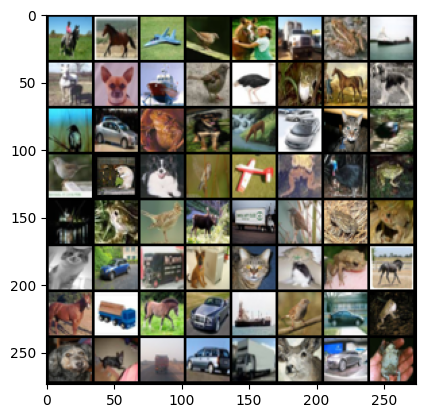

In [78]:
ic = ImageClassification()
ic.load_data()
ic.show_data()


In [ ]:
#TODO: Experiment with different layers of CNN to understand why something works and why something doesn't work doesn't

In [69]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # Define the convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)

        # Define the pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Define the fully connected layers
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)

        # Dropout layer (to reduce overfitting)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Convolutional layers with ReLU and pooling
        x = self.pool(F.relu(self.conv1(x)))  # Output: (32, 32, 32)
        x = self.pool(F.relu(self.conv2(x)))  # Output: (64, 16, 16)
        x = self.pool(F.relu(self.conv3(x)))  # Output: (128, 8, 8)

        # Flatten the output for the fully connected layer
        x = x.view(-1, 128 * 4 * 4)

        # Fully connected layers with ReLU and dropout
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x

# Instantiate the model
model = CNNModel()
print(model)

CNNModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [ ]:
#TODO: Write cross entropy and adam optimizer on your own?

In [70]:
import torch.optim as optim

# Define the loss function (Cross-Entropy Loss) and optimizer (Adam)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [73]:
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in ic.trainloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(ic.trainloader):.4f}')

Epoch [1/10], Loss: 1.3471
Epoch [2/10], Loss: 1.0854
Epoch [3/10], Loss: 0.9197
Epoch [4/10], Loss: 0.8118
Epoch [5/10], Loss: 0.7353
Epoch [6/10], Loss: 0.6635
Epoch [7/10], Loss: 0.6041
Epoch [8/10], Loss: 0.5538
Epoch [9/10], Loss: 0.5078
Epoch [10/10], Loss: 0.4641


In [79]:
correct = 0
total = 0
model.eval()  # Set the model to evaluation mode (disable dropout)

with torch.no_grad():  # No need to compute gradients during evaluation
    for inputs, labels in ic.testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1) #TODO: What is this doing?
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the CIFAR-10 test images: {accuracy:.2f}%')

Accuracy of the model on the CIFAR-10 test images: 75.94%
